In [18]:
from helpers import load_csv_data
from implementations import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
data_folder = './data/'
x_train, x_test, y_train, train_ids, test_ids, feature_names, default_values = load_csv_data(data_folder, sub_sample=False)

In [61]:
# Pandas version
# drop first column (ids)
df_x_train = pd.read_csv(data_folder + 'x_train.csv').drop(columns=['Id'])
df_y_train = pd.read_csv(data_folder + 'y_train.csv').drop(columns=['Id'])
df_x_test = pd.read_csv(data_folder + 'x_test.csv').drop(columns=['Id'])

In [62]:
print("Number of training samples: ", x_train.shape[0]
      , "\nNumber of test samples: ", x_test.shape[0]
      , "\nNumber of features: ", x_train.shape[1])

Number of training samples:  328135 
Number of test samples:  109379 
Number of features:  321


In [63]:
# Pandas version
print(df_x_train.info())
print(df_x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328135 entries, 0 to 328134
Columns: 321 entries, _STATE to _AIDTST3
dtypes: float64(244), int64(77)
memory usage: 803.6 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109379 entries, 0 to 109378
Columns: 321 entries, _STATE to _AIDTST3
dtypes: float64(237), int64(84)
memory usage: 267.9 MB
None


# Preprocessing

## Replace default values in dataset by NaN

In [ ]:
print("Default values for _PRACE1:", default_values[feature_names.index('_PRACE1')])
print("Value of _PRACE1 for sample 9:", x_train[9,feature_names.index('_PRACE1')])
print("Value of _PRACE1 for sample 202:", x_train[202,feature_names.index('_PRACE1')])

for i, feature in enumerate(feature_names):
    for default_value in default_values[i]:
        x_train[x_train[:, i] == default_value, i] = np.nan
        x_test[x_test[:, i] == default_value, i] = np.nan

print("Value of _PRACE1 for sample 9:", x_train[9,feature_names.index('_PRACE1')])
print("Value of _PRACE1 for sample 202:", x_train[202,feature_names.index('_PRACE1')])

In [78]:
# With Pandas
print("Value of _PRACE1 for sample 9:", df_x_train.loc[9, '_PRACE1'])
print("Value of _PRACE1 for sample 202:", df_x_train.loc[202, '_PRACE1'])

for i, feature in enumerate(feature_names):
    # Replace default values with NaN
    for default_value in default_values[i]:
        df_x_train.loc[df_x_train[feature] == default_value, feature] = np.nan
        df_x_test.loc[df_x_test[feature] == default_value, feature] = np.nan
        
print("Value of _PRACE1 for sample 9:", df_x_train.loc[9, '_PRACE1'])
print("Value of _PRACE1 for sample 202:", df_x_train.loc[202, '_PRACE1'])

Value of _PRACE1 for sample 9: 77
Value of _PRACE1 for sample 202: 99
Value of _PRACE1 for sample 9: nan
Value of _PRACE1 for sample 202: nan


In [46]:
x_train, x_test = normalize(x_train, x_train)

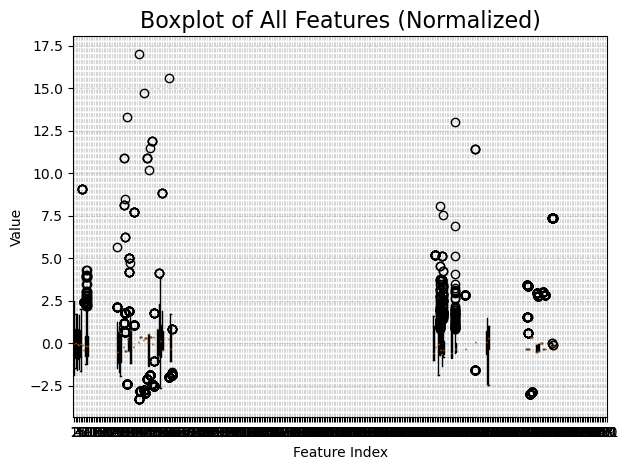

In [25]:
# Make boxplot with colors
box = plt.boxplot(x_train, patch_artist=True, notch=False, widths=0.6)



# Labels
plt.title("Boxplot of All Features (Normalized)", fontsize=16)
plt.xlabel("Feature Index")
plt.ylabel("Value")

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


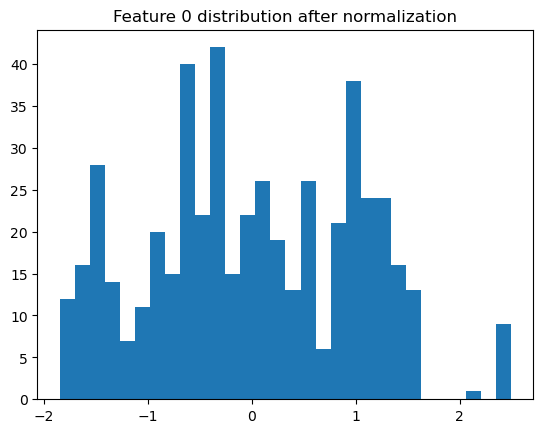

In [26]:
plt.hist(x_train[:, 0], bins=30)
plt.title("Feature 0 distribution after normalization")
plt.show()


c:\Users\natha\miniconda3\envs\ML_course\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\natha\miniconda3\envs\ML_course\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0, 0.5, 'Features')

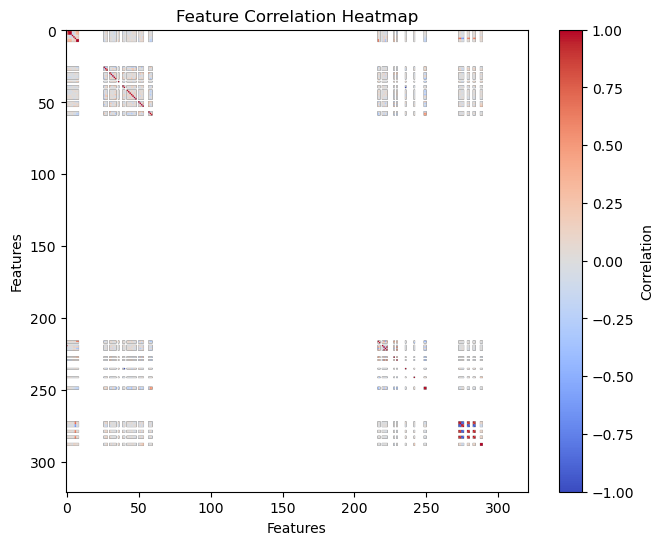

In [27]:
corr_matrix = np.corrcoef(x_train, rowvar=False)  # shape (D, D)

# Step 2: Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.title("Feature Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")



In [29]:
threshold = 0.9
high_corr_pairs = []

for i in range (corr_matrix.shape[0]):
    for j in range (i+1, corr_matrix.shape[0]):
        if abs(corr_matrix[i,j]) > threshold:
            high_corr_pairs.append((i,j))
            
            print(f"Features {feature_names[i]} and {feature_names[j]} have correlation {corr_matrix[i,j]:.2f}")
    

Features _STATE and _STSTR have correlation 1.00
Features FMONTH and IDATE have correlation 0.93
Features FMONTH and IMONTH have correlation 0.93
Features IDATE and IMONTH have correlation 1.00
Features SEQNO and _PSU have correlation 1.00
Features ASTHMA3 and _LTASTH1 have correlation -1.00
Features _STRWT and _WT2RAKE have correlation 0.95
Features _AGE80 and _AGE_G have correlation 0.97
Features _MISFRTN and _FRTRESP have correlation -0.96
Features _MISFRTN and _FRTLT1 have correlation 0.94
Features _MISFRTN and _FRUITEX have correlation 0.96
Features _MISVEGN and _VEGRESP have correlation -0.91
Features _MISVEGN and _VEGLT1 have correlation 0.90
Features _MISVEGN and _VEGETEX have correlation 0.91
Features _FRTRESP and _FRTLT1 have correlation -0.98
Features _FRTRESP and _FRUITEX have correlation -1.00
Features _VEGRESP and _VEGLT1 have correlation -0.99
Features _VEGRESP and _VEGETEX have correlation -1.00
Features _FRTLT1 and _FRUITEX have correlation 0.98
Features _VEGLT1 and _V

# Test of the algorithms on a linear regression between 2 features

Weights from GD:  [-4.01001181e-17  8.69006895e-01]
Weights from SGD:  [0.06192925 0.97144665]
Weights from LS:  [-4.32724161e-17  8.69029977e-01]


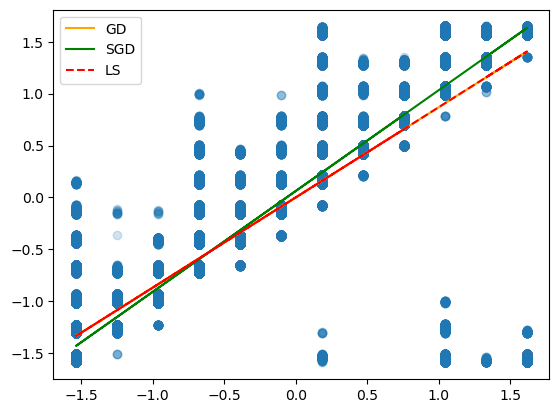

In [47]:
# We observe that features 1 and 2 are correlated
# Let's test our algorithms on these two features only

import numpy as np
from matplotlib import pyplot as plt
from implementations import mean_squared_error_gd, mean_squared_error_sgd, least_squares

tx = np.ones((x_train.shape[0], 2))
tx[:, 1] = x_train[:, 1]

w_gd, _ = mean_squared_error_gd(x_train[:,2], tx, np.array([0., 0.]), max_iters=100, gamma=0.1)
w_sgd, _ = mean_squared_error_sgd(x_train[:,2], tx, np.array([0., 0.]), max_iters=10000, gamma=0.1)
w_ls, _ = least_squares(x_train[:,2], tx)

print("Weights from GD: ", w_gd)
print("Weights from SGD: ", w_sgd)
print("Weights from LS: ", w_ls)

plt.scatter(x_train[:, 1], x_train[:, 2], alpha=0.2)
plt.plot(x_train[:, 1], tx @ w_gd, label='GD', color='orange')
plt.plot(x_train[:, 1], tx @ w_sgd, label='SGD', color='green')
plt.plot(x_train[:, 1], tx @ w_ls, label='LS', color='red', linestyle='dashed')
plt.legend()